In [4]:
import pandas as pd
# Load the Huntington dataset
huntington_data = pd.read_csv('/Users/kazinafis/Downloads/Huntington.csv')

# Display the first few rows to understand the structure and check for any obvious issues
huntington_data.head(), huntington_data.columns


(   IDRSSD  CERT                          NAME      CITY STNAME        DATE  \
 0   12311  6560  The Huntington National Bank  Columbus   Ohio  2023-12-31   
 1   12311  6560  The Huntington National Bank  Columbus   Ohio  2023-09-30   
 2   12311  6560  The Huntington National Bank  Columbus   Ohio  2023-06-30   
 3   12311  6560  The Huntington National Bank  Columbus   Ohio  2023-03-31   
 4   12311  6560  The Huntington National Bank  Columbus   Ohio  2022-12-31   
 
    DRLNLS  YYYY_QQ  YYYYQQ Scenario.Name  ...  X10.year.Treasury.yield  \
 0  454575  2023 Q4  2023Q4        Actual  ...                      4.5   
 1  321797  2023 Q3  2023Q3        Actual  ...                      4.2   
 2  190826  2023 Q2  2023Q2        Actual  ...                      3.7   
 3   98634  2023 Q1  2023Q1        Actual  ...                      3.7   
 4  313420  2022 Q4  2022Q4        Actual  ...                      3.9   
 
    BBB.corporate.yield  Mortgage.rate  Prime.rate  \
 0                

In [5]:
# Step 1: Convert the 'DATE' column to datetime format
huntington_data['DATE'] = pd.to_datetime(huntington_data['DATE'])

# Step 2: Select relevant features based on consistency with previous analysis
selected_features_huntington = [
    'Real.GDP.growth', 'Unemployment.rate', 'CPI.inflation.rate', 
    'Mortgage.rate', 'BBB.corporate.yield', 'DRLNLS'
]

# Create a new DataFrame with these selected features
huntington_selected = huntington_data[selected_features_huntington]

# Step 3: Check for and handle missing values
missing_values_huntington = huntington_selected.isnull().sum()

# Display the prepared data and any missing values
huntington_selected.head(), missing_values_huntington


(   Real.GDP.growth  Unemployment.rate  CPI.inflation.rate  Mortgage.rate  \
 0              1.5                3.7                 2.8            7.3   
 1              4.9                3.7                 3.6            7.0   
 2              2.1                3.6                 2.7            6.5   
 3              2.2                3.5                 3.8            6.4   
 4              2.6                3.6                 4.2            6.7   
 
    BBB.corporate.yield  DRLNLS  
 0                  6.2  454575  
 1                  6.0  321797  
 2                  5.7  190826  
 3                  5.6   98634  
 4                  6.1  313420  ,
 Real.GDP.growth        0
 Unemployment.rate      0
 CPI.inflation.rate     0
 Mortgage.rate          0
 BBB.corporate.yield    0
 DRLNLS                 0
 dtype: int64)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Splitting the data into training and testing sets
X_huntington = huntington_selected.drop('DRLNLS', axis=1)
y_huntington = huntington_selected['DRLNLS']
X_train_hunt, X_test_hunt, y_train_hunt, y_test_hunt = train_test_split(X_huntington, y_huntington, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
linear_model_hunt = LinearRegression()
linear_model_hunt.fit(X_train_hunt, y_train_hunt)

# Initialize and train a Random Forest model
rf_model_hunt = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_hunt.fit(X_train_hunt, y_train_hunt)

# Predict on the testing set for both models
y_pred_linear_hunt = linear_model_hunt.predict(X_test_hunt)
y_pred_rf_hunt = rf_model_hunt.predict(X_test_hunt)

# Calculate the Mean Squared Error for both models
mse_linear_hunt = mean_squared_error(y_test_hunt, y_pred_linear_hunt)
mse_rf_hunt = mean_squared_error(y_test_hunt, y_pred_rf_hunt)

mse_linear_hunt, mse_rf_hunt


(22649403772.175438, 27043594232.28286)

In [10]:
# Load the Supervisory Adverse Scenario Data
supervisory_data = pd.read_csv('/Users/kazinafis/Downloads/2024-Table_4A_Supervisory_Severely_Adverse_Domestic.csv')

# Select and align features for the Supervisory data to match the Huntington model features
supervisory_features_selected = supervisory_data[['Real GDP growth', 'Unemployment rate', 'CPI inflation rate', 
                                                  'Mortgage rate', 'BBB corporate yield']]
supervisory_features_selected.columns = ['Real.GDP.growth', 'Unemployment.rate', 'CPI.inflation.rate', 
                                         'Mortgage.rate', 'BBB.corporate.yield']

# Apply the trained models to the supervisory data
predictions_linear_supervisory = linear_model_hunt.predict(supervisory_features_selected)
predictions_rf_supervisory = rf_model_hunt.predict(supervisory_features_selected)

# Display predictions for the first few scenarios
pd.DataFrame({
    'Scenario Date': supervisory_data['Date'],
    'Linear Regression Predictions': predictions_linear_supervisory,
    'Random Forest Predictions': predictions_rf_supervisory
}).head()


,Scenario Date,Linear Regression Predictions,Random Forest Predictions
0,2024 Q1,307929.880050,181613.23
1,2024 Q2,458768.027012,204561.26
2,2024 Q3,518733.530365,232793.51
3,2024 Q4,594805.690191,612688.47
4,2025 Q1,628442.955615,752768.50


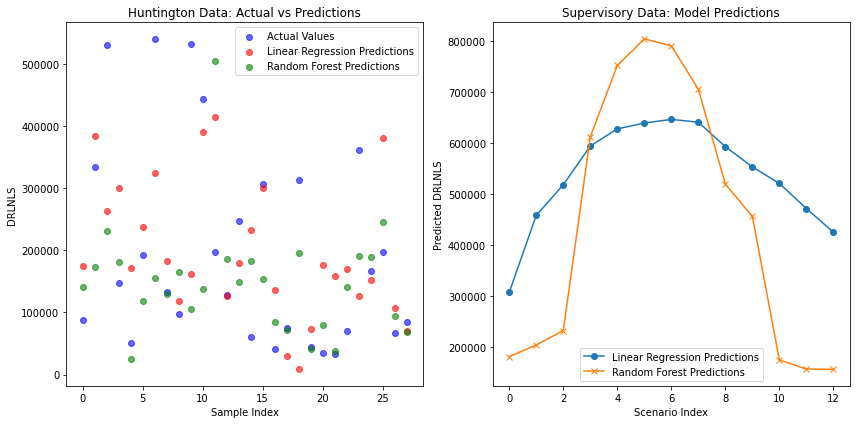

In [14]:
import matplotlib.pyplot as plt

# Plotting predictions vs. actual values for Huntington data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test_hunt)), y_test_hunt, color='blue', label='Actual Values', alpha=0.6)
plt.scatter(range(len(y_test_hunt)), y_pred_linear_hunt, color='red', label='Linear Regression Predictions', alpha=0.6)
plt.scatter(range(len(y_test_hunt)), y_pred_rf_hunt, color='green', label='Random Forest Predictions', alpha=0.6)
plt.title('Huntington Data: Actual vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('DRLNLS')
plt.legend()

# Plotting model predictions on Supervisory scenario data
plt.subplot(1, 2, 2)
plt.plot(predictions_linear_supervisory, label='Linear Regression Predictions', marker='o')
plt.plot(predictions_rf_supervisory, label='Random Forest Predictions', marker='x')
plt.title('Supervisory Data: Model Predictions')
plt.xlabel('Scenario Index')
plt.ylabel('Predicted DRLNLS')
plt.legend()
plt.tight_layout()
plt.show()


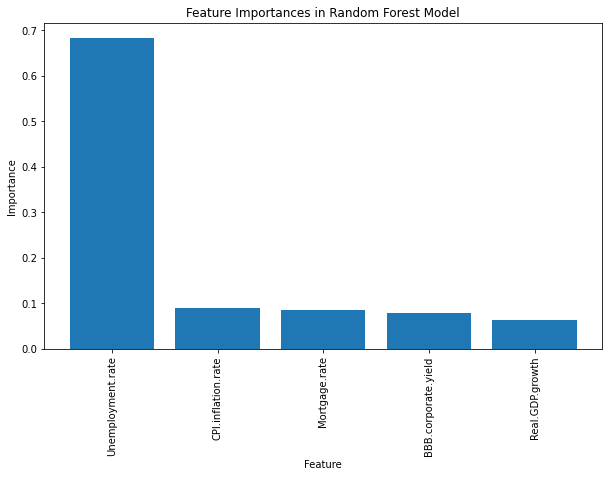

In [18]:
!pip install numpy
import numpy as np

# Get feature importances from the Random Forest model
importances = rf_model_hunt.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Random Forest Model')
plt.bar(range(X_huntington.shape[1]), importances[indices], align='center')
plt.xticks(range(X_huntington.shape[1]), X_huntington.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score

# Set up the number of folds
num_folds = 5

# Perform cross-validation for the Linear Regression model
cv_scores_linear = cross_val_score(linear_model_hunt, X_huntington, y_huntington, cv=num_folds, scoring='neg_mean_squared_error')

# Perform cross-validation for the Random Forest model
cv_scores_rf = cross_val_score(rf_model_hunt, X_huntington, y_huntington, cv=num_folds, scoring='neg_mean_squared_error')

# The scores are returned as negative MSE (by convention), so we'll take the negative to make them positive MSE
cv_scores_linear_positive = -cv_scores_linear
cv_scores_rf_positive = -cv_scores_rf

# Calculate the mean and standard deviation of the MSE for both models across all folds
cv_mean_mse_linear = cv_scores_linear_positive.mean()
cv_std_mse_linear = cv_scores_linear_positive.std()

cv_mean_mse_rf = cv_scores_rf_positive.mean()
cv_std_mse_rf = cv_scores_rf_positive.std()

(cv_mean_mse_linear, cv_std_mse_linear), (cv_mean_mse_rf, cv_std_mse_rf)


((50035765353.43746, 33094628184.89902),
 (31156929173.95614, 19341657520.27985))

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Number of folds in cross-validation
                           scoring='neg_mean_squared_error',  # MSE to evaluate performance
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Perform grid search (this may take some time)
grid_search.fit(X_huntington, y_huntington)

# Get the best parameters and the corresponding mean cross-validated MSE
best_params = grid_search.best_params_
best_cv_score = -grid_search.best_score_  # Negate to get positive MSE value

(best_params, best_cv_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 150},
 30226633963.031605)

In [21]:
# Re-train the Random Forest model with the best parameters
tuned_rf_model_hunt = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
tuned_rf_model_hunt.fit(X_train_hunt, y_train_hunt)

# Evaluate the tuned model on the test set
tuned_y_pred_rf_hunt = tuned_rf_model_hunt.predict(X_test_hunt)
tuned_mse_rf_hunt = mean_squared_error(y_test_hunt, tuned_y_pred_rf_hunt)

tuned_mse_rf_hunt


27161329117.288273